In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import warnings
import PIL.Image
warnings.filterwarnings(action='ignore')

In [2]:
# Train Image Load 함수
def load_image(path):

    path = path
    images = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [3]:
# Train Image 시각화 함수
def show_image(image):
  img_rgb = image

  plt.figure(figsize=(10, 2))

  plt.subplot(141)
  plt.imshow(img_rgb[50:200, 50:200, :])
  plt.axis("off")
  plt.title("RGB Image")

  plt.subplot(142)
  plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("R channel")

  plt.subplot(143)
  plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("G channel")

  plt.subplot(144)
  plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("B channel")

  plt.show()

In [4]:
### Load Hand Language Dataset

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = "/content/gdrive/My Drive/dataset/hand_language_dataset/"
image_label_df = pd.read_csv(PATH + 'train.csv') # Image의 Label 정보를 담고 있는 csv 파일 로드

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
image_label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


### Load Training IMG

In [7]:
# 학습시킬 Image Data Load
training_images = load_image(path= '/content/gdrive/My Drive/dataset/hand_language_dataset/train/')

In [8]:
print("Image Shape: (count, high pixel, width pixel, channels)")
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", image_label_df.shape)


Image Shape: (count, high pixel, width pixel, channels)
train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


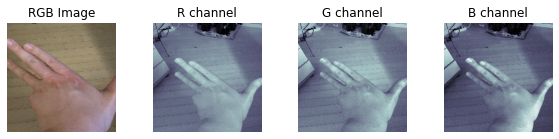

In [9]:
show_image(training_images[3])

# 데이터에 존재하는 Label 확인

In [10]:
print(np.unique(image_label_df.label))


['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


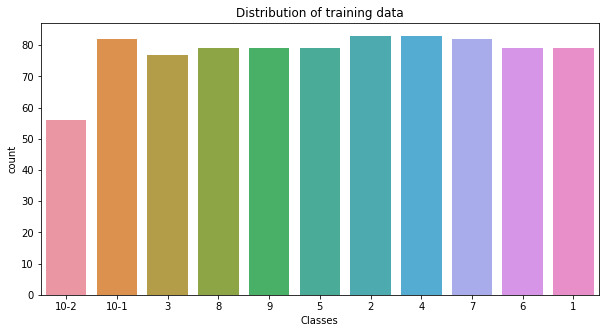

In [11]:
plt.figure(figsize=[10,5])
sns.countplot(image_label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

# 데이터에 Label Value 정수형으로 변환


In [12]:
image_label_df['label'][image_label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
image_label_df['label'][image_label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
image_label_df['label'] = image_label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

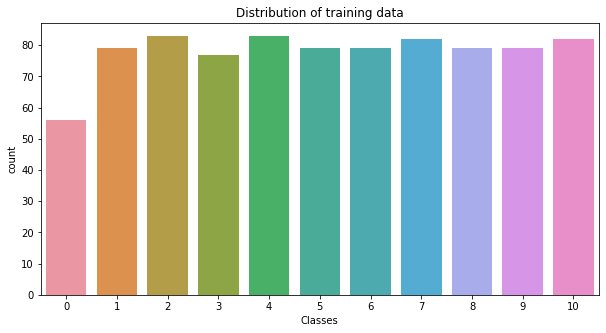

In [13]:
plt.figure(figsize=[10,5])
sns.countplot(image_label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [14]:
#print(np.unique(image_label_df.label))

image_label_df.iloc[:,1]

0       0
1      10
2       3
3       8
4       9
       ..
853     9
854     1
855     4
856    10
857     7
Name: label, Length: 858, dtype: int64

In [15]:

from tensorflow.keras.utils import to_categorical
datax = training_images
datay = image_label_df.iloc[:,1]
datay_onehot = to_categorical(datay)


In [16]:
print(datax.shape)
print(datay.shape)
print(datay_onehot)
print(datay_onehot.shape)

(858, 224, 224, 3)
(858,)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
(858, 11)


In [21]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay_onehot, test_size = 0.3, random_state =111)
print(f"trnx.shape: {trnx.shape}")
print(f"tstx.shape: {tstx.shape}")
print(f"trny.shape: {trny.shape}")
print(f"tsty.shape: {tsty.shape}")

trnx.shape: (600, 224, 224, 3)
tstx.shape: (258, 224, 224, 3)
trny.shape: (600, 11)
tsty.shape: (258, 11)


In [33]:
from tensorflow.keras import layers, models, optimizers
input_shape = (trnx.shape[2],trnx.shape[1],3)
print(input_shape)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(8,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(24,(3,3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 1000, activation = "relu"))
cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

(224, 224, 3)


In [34]:
# 입력값들을 CNN에 넣기 위해 4D tensor로 변환 (row, height, width, depth)
trnx_reshaped = trnx.reshape(-1,trnx.shape[2],trnx.shape[1],3)
tstx_reshaped = tstx.reshape(-1,tstx.shape[2],tstx.shape[1],3)
print(trnx_reshaped.shape)
print(tstx_reshaped.shape)
print(trny.shape)
print(tsty.shape)

cnn_model.summary()

(600, 224, 224, 3)
(258, 224, 224, 3)
(600, 11)
(258, 11)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 8)       104       
                                                                 
 batch_normalization_10 (Bat  (None, 224, 224, 8)      32        
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 16)      528       
                                                              

In [35]:
histroy = cnn_model.fit(trnx_reshaped, trny, validation_data = [tstx_reshaped,tsty], batch_size = 32, epochs = 100)

Epoch 1/100
19/19 [==============================] - 2s 51ms/step - loss: 15.2573 - accuracy: 0.0817 - val_loss: 5.1599 - val_accuracy: 0.1085
Epoch 2/100
19/19 [==============================] - 1s 34ms/step - loss: 2.6616 - accuracy: 0.1100 - val_loss: 2.7308 - val_accuracy: 0.1047
Epoch 3/100
19/19 [==============================] - 1s 38ms/step - loss: 2.3534 - accuracy: 0.1617 - val_loss: 2.5336 - val_accuracy: 0.0891
Epoch 4/100
19/19 [==============================] - 1s 34ms/step - loss: 2.2436 - accuracy: 0.2100 - val_loss: 2.4685 - val_accuracy: 0.0930
Epoch 5/100
19/19 [==============================] - 1s 33ms/step - loss: 2.1716 - accuracy: 0.2333 - val_loss: 2.4377 - val_accuracy: 0.1202
Epoch 6/100
19/19 [==============================] - 1s 34ms/step - loss: 2.1802 - accuracy: 0.2400 - val_loss: 2.4315 - val_accuracy: 0.0543
Epoch 7/100
19/19 [==============================] - 1s 38ms/step - loss: 2.0709 - accuracy: 0.2950 - val_loss: 2.4425 - val_accuracy: 0.1163
Epoch